In [1]:
######################################### Libraries ############################################

import numpy as np
import matplotlib.pyplot as plt
from pylab import * 
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import sweetviz as sv
import pandas as pd
import random
import sys
import matplotlib.cm as cm
import matplotlib.colors
from matplotlib import animation, colors
import matplotlib.patches as mpatches
import seaborn as sns


In [2]:
# K-means and silhouette coef. methods:
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from pyrolite.util.classification import TAS
from pyrolite.util.synthetic import normal_frame, random_cov_matrix

# Self-Organizing Maps modules:
from numpy.ma.core import ceil
from scipy.spatial import distance #distance calculation
from sklearn.preprocessing import MinMaxScaler #normalisation
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score #scoring
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from matplotlib import animation, colors

### Loading Geochemical data:

In [3]:
df = pd.read_excel('data/aula5.xlsx')
df

,Sample,SiO2,TiO2,Al2O3,Fe2O3,MnO,MgO,CaO,Na2O,K2O,...,Sm,Eu,Gd,Tb,Dy,Ho,Er,Tm,Yb,Lu
0,S1,71.82,0.447,14.26,2.24,0.020,0.44,1.35,2.91,5.93,...,11.1,0.94,6.1,0.6,2.9,0.5,1.1,0.13,0.8,0.11
1,S2,70.01,0.702,14.37,3.47,0.044,0.67,1.43,2.96,5.14,...,22.7,1.93,13.0,1.4,6.8,1.2,2.8,0.36,2.1,0.31
2,S3,69.59,0.656,14.06,3.44,0.060,0.66,1.73,2.79,5.29,...,19.1,1.78,9.8,0.8,3.5,0.5,1.2,0.14,0.8,0.11
3,S4,68.12,0.750,13.87,3.63,0.053,0.68,1.82,2.54,5.89,...,26.7,2.94,16.2,1.9,9.3,1.5,4.2,0.60,3.8,0.57
4,S5,72.63,0.347,13.90,1.71,0.023,0.33,0.91,2.95,5.80,...,9.6,0.67,5.2,0.6,2.3,0.3,0.8,0.10,0.6,0.08
5,S6,73.53,0.346,14.26,1.71,0.022,0.34,0.99,2.99,5.79,...,9.2,0.66,5.2,0.5,2.3,0.3,0.8,0.10,0.6,0.08
6,S7,71.73,0.458,13.77,2.46,0.031,0.52,1.46,2.75,5.36,...,13.2,1.28,7.6,0.7,3.1,0.5,1.1,0.12,0.7,0.10
7,S8,72.83,0.410,13.54,2.11,0.025,0.42,0.99,2.54,6.15,...,13.2,0.78,7.4,0.8,3.5,0.5,1.1,0.15,1.0,0.14
8,S9,73.84,0.382,13.45,1.71,0.017,0.34,1.16,2.76,5.57,...,13.3,0.99,6.6,0.8,3.6,0.5,1.1,0.12,0.6,0.07
9,S10,67.60,0.744,13.86,3.55,0.047,0.68,1.86,2.56,5.88,...,21.8,2.36,12.5,1.5,7.2,1.3,3.5,0.49,2.7,0.34


### Separation and calculation of new percentages:

In [4]:
def new_perc(df, l):
    '''
    input:
    df = dataframe original
    l = linha que deseja realizar a operação
    
    operation:
    
    output:
    df_n.T = um sub dataframe com novas porcentagens de cada elemento
    '''
    
    df_sub = df.iloc[l,1:11]
    df_new = np.copy(df_sub)
    df_total = df.iloc[l,12]
    s = 0

    for i in range(len(df_sub)):
        s += df_sub.iloc[i]

        for j in range(len(df_sub)):
            df_new[j] = (df_sub[j]*100)/s

    df_n = [df_new[0], df_new[1], df_new[2], df_new[3], df_new[4], df_new[5], 
            df_new[6], df_new[7], df_new[8], df_new[9]]
    
    df_n = np.array(df_n).T
    
    return df_n


In [5]:
def new_dataframe(df):
    '''
    input = df (data frame original)
    
    operation = use the function "new_por" to calculate a new % to all rows
    
    return = new data frame with new %
    '''
    
    df_new = []
    for k in range(len(df)):
        df_new.append(new_perc(df,k))

    cab = ['SiO2', 'TiO2', 'Al2O3', 'Fe2O3', 'MnO', 'MgO', 'CaO', 'Na2O', 'K2O', 'P2O5']
    df_new = pd.DataFrame(df_new, columns = cab)
    
    return df_new


In [6]:
df_f = new_dataframe(df)

In [7]:
df_f

,SiO2,TiO2,Al2O3,Fe2O3,MnO,MgO,CaO,Na2O,K2O,P2O5
0,72.154073,0.449079,14.326331,2.250419,0.020093,0.442047,1.356280,2.923536,5.957584,0.120558
1,70.712886,0.709048,14.514272,3.504838,0.044442,0.676727,1.444357,2.989718,5.191605,0.212108
2,70.659789,0.666085,14.276141,3.492882,0.060922,0.670146,1.756595,2.832890,5.371322,0.213228
3,69.821551,0.768734,14.216455,3.720673,0.054324,0.696986,1.865461,2.603446,6.037125,0.215246
4,73.534474,0.351321,14.073099,1.731295,0.023286,0.334110,0.921332,2.986737,5.872228,0.172117
5,73.421336,0.345489,14.238926,1.707473,0.021967,0.339498,0.988537,2.985581,5.781443,0.169749
6,72.646067,0.463849,13.945857,2.491417,0.031396,0.526641,1.478646,2.785120,5.428453,0.202554
7,73.435846,0.413411,13.652634,2.127552,0.025208,0.423494,0.998235,2.561129,6.201160,0.161331
8,74.353785,0.384658,13.543586,1.721898,0.017118,0.342366,1.168071,2.779204,5.608757,0.080557
9,69.690003,0.767002,14.288512,3.659756,0.048453,0.701024,1.917506,2.639148,6.061793,0.226802


### Normalizing data:

#### Note: fundamental step for machine learning methods, to avoid biases in learning

In [8]:
def norm_data(data):
    
    data_norm = np.zeros((len(data)))
    for i in range(len(data)):
        data_norm[i] = (data[i] - min(data))/(max(data) - min(data))
        
    return data_norm

In [9]:
norm_1 = norm_data(df_f['SiO2'])
norm_2 = norm_data(df_f['TiO2'])
norm_3 = norm_data(df_f['Al2O3'])
norm_4 = norm_data(df_f['Fe2O3'])
norm_5 = norm_data(df_f['MnO'])
norm_6 = norm_data(df_f['MgO'])
norm_7 = norm_data(df_f['CaO'])
norm_8 = norm_data(df_f['Na2O'])
norm_9 = norm_data(df_f['K2O'])
norm_10 = norm_data(df_f['P2O5'])

In [10]:
df_norm = {'SiO2': norm_1, 
           'TiO2': norm_2,
           'Al2O3': norm_3,
           'Fe2O3': norm_4,
           'MnO': norm_5,
           'MgO': norm_6,
           'CaO': norm_7,
           'Na2O': norm_8,
           'K2O': norm_9,
           'P2O5': norm_10}
    
df_new = pd.DataFrame(df_norm)
df_new

,SiO2,TiO2,Al2O3,Fe2O3,MnO,MgO,CaO,Na2O,K2O,P2O5
0,0.631532,0.159143,0.557882,0.259865,0.107841,0.245599,0.248666,0.731626,0.773091,0.156045
1,0.447551,0.485481,0.659408,0.709287,0.543231,0.509545,0.277390,0.797498,0.230709,0.513179
2,0.440772,0.431549,0.530769,0.705004,0.837927,0.502143,0.379218,0.641404,0.357965,0.517548
3,0.333763,0.560404,0.498527,0.786615,0.719937,0.532330,0.414722,0.413034,0.829413,0.525417
4,0.807753,0.036428,0.421086,0.073878,0.164943,0.124201,0.106820,0.794531,0.712652,0.357174
5,0.793310,0.029106,0.510666,0.065343,0.141359,0.130261,0.128737,0.793381,0.648368,0.347936
6,0.694340,0.177684,0.352349,0.346208,0.309952,0.340742,0.288572,0.593858,0.398419,0.475909
7,0.795162,0.114368,0.193949,0.215846,0.199303,0.224732,0.131900,0.370916,0.945565,0.315098
8,0.912346,0.078275,0.135041,0.070512,0.054648,0.133487,0.187287,0.587970,0.526090,0.000000
9,0.316970,0.558231,0.537452,0.764790,0.614959,0.536872,0.431695,0.448569,0.846881,0.570498


In [11]:
X = np.array(df_new)

### Crossplots:

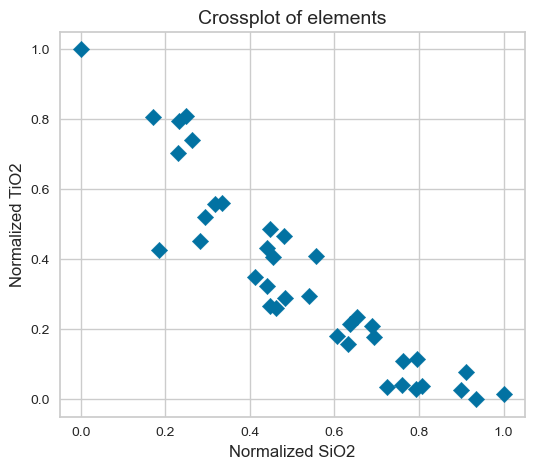

In [12]:
import matplotlib.patches as mpatches

plt.close('all')
plt.figure(figsize=(6,5))

plt.scatter(X[:,0], X[:,1],
            s=70, alpha=1.0) 

#plt.legend(bbox_to_anchor=(0.74, 0.58))
plt.title('Crossplot of elements', fontsize = 14)
plt.xlabel('Normalized SiO2', fontsize = 12)
plt.ylabel('Normalized TiO2', fontsize = 12)
plt.grid(True)
plt.show()

##### The graph above shows the percentage change correlation (normalized) between two elements: TiO2 and SiO2. The behavior is negatively correlated, where the percentage of TiO2 increases and that of SiO2 decreases.

### Correlation Matrix:

In [13]:
mask_sana = np.triu(df_new.corr())

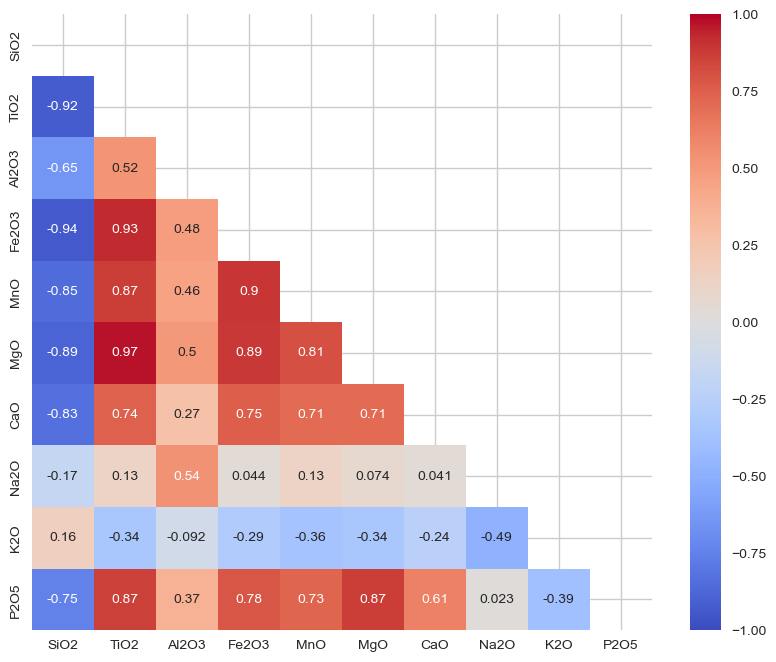

In [14]:
corr_sana = sns.heatmap(df_f.corr(), annot=True, vmin=-1, vmax=1, cmap='coolwarm', mask=mask_sana)
corr_sana.figure.set_size_inches(10, 8)


##### Graph above shows correlation relates behavior between elements. In tones of blue, the correlation is negative (when the percentage of one element increases the other decreases). In tones of red, the correlation is positive (when the percentage of one element increases, the other increases).

### Machine learning:

#### K-Means:

In [15]:
# Módulos do k-means e met. silhueta:
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import KElbowVisualizer


In [16]:
# Cozinha do K-means: ### Testes com 9 clusters e 2 rochas "acertadas"!

#nprop  = 3                 # número de propriedades físicas ativas
nclust  = 6               # numero de clusters utilizados
maxiter = 100 ###              # numero maximo de iteracoes 
toler   = 1e-8 ###        # tolerancia para o criterio de parada 
ninit   = 30 ###               # numero de inicializacoes do Kmeans

#### Silhouette coef.:

For n_clusters = 2 The average silhouette_score is : 0.3793524037939384
For n_clusters = 3 The average silhouette_score is : 0.33088907238451215
For n_clusters = 4 The average silhouette_score is : 0.30279207414145765
For n_clusters = 5 The average silhouette_score is : 0.2698153889720517
For n_clusters = 6 The average silhouette_score is : 0.2671858445458494
For n_clusters = 7 The average silhouette_score is : 0.2776417961206111
For n_clusters = 8 The average silhouette_score is : 0.28226281846992357
For n_clusters = 9 The average silhouette_score is : 0.27230780760936096
For n_clusters = 10 The average silhouette_score is : 0.2505009932484238


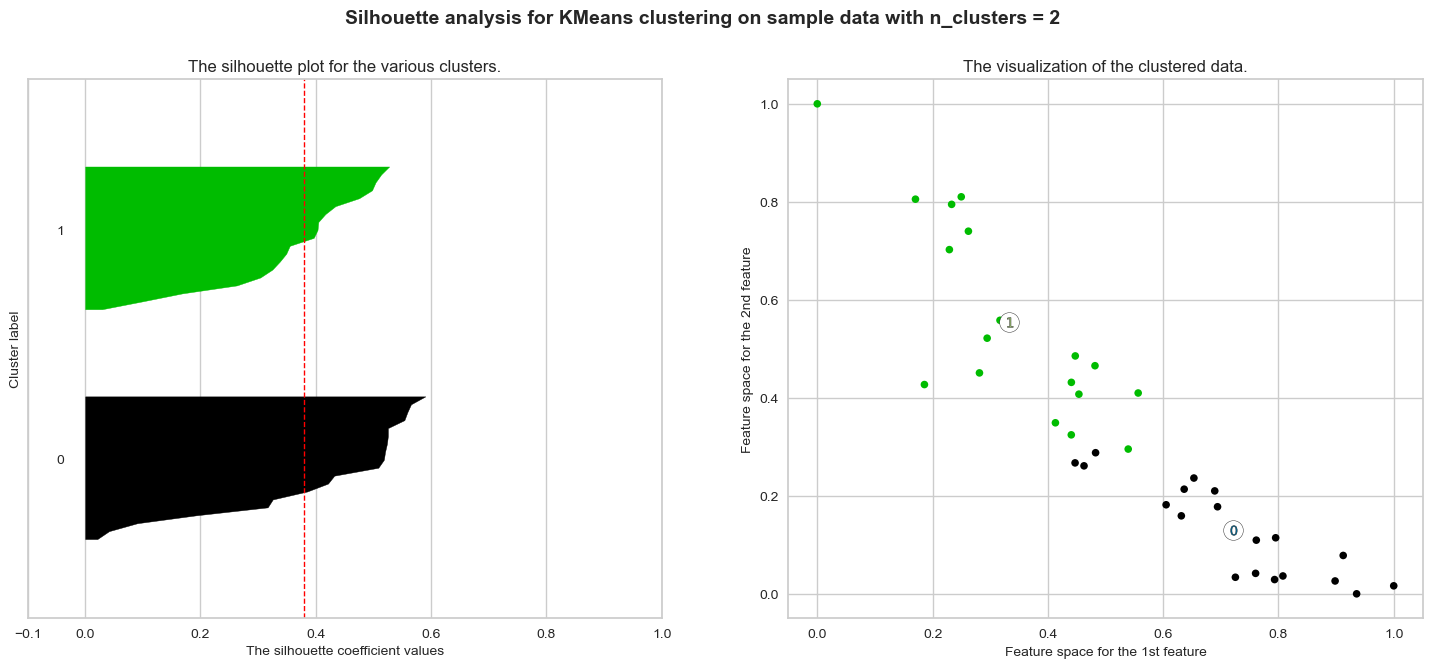

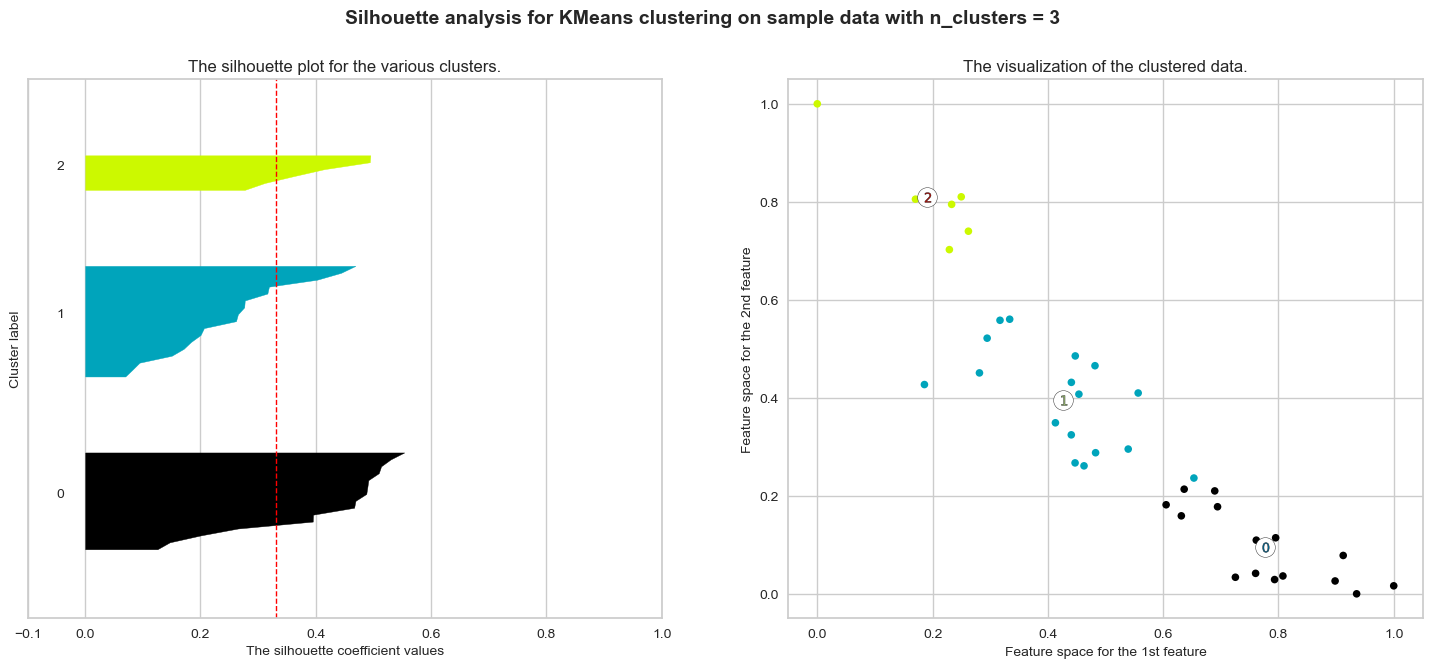

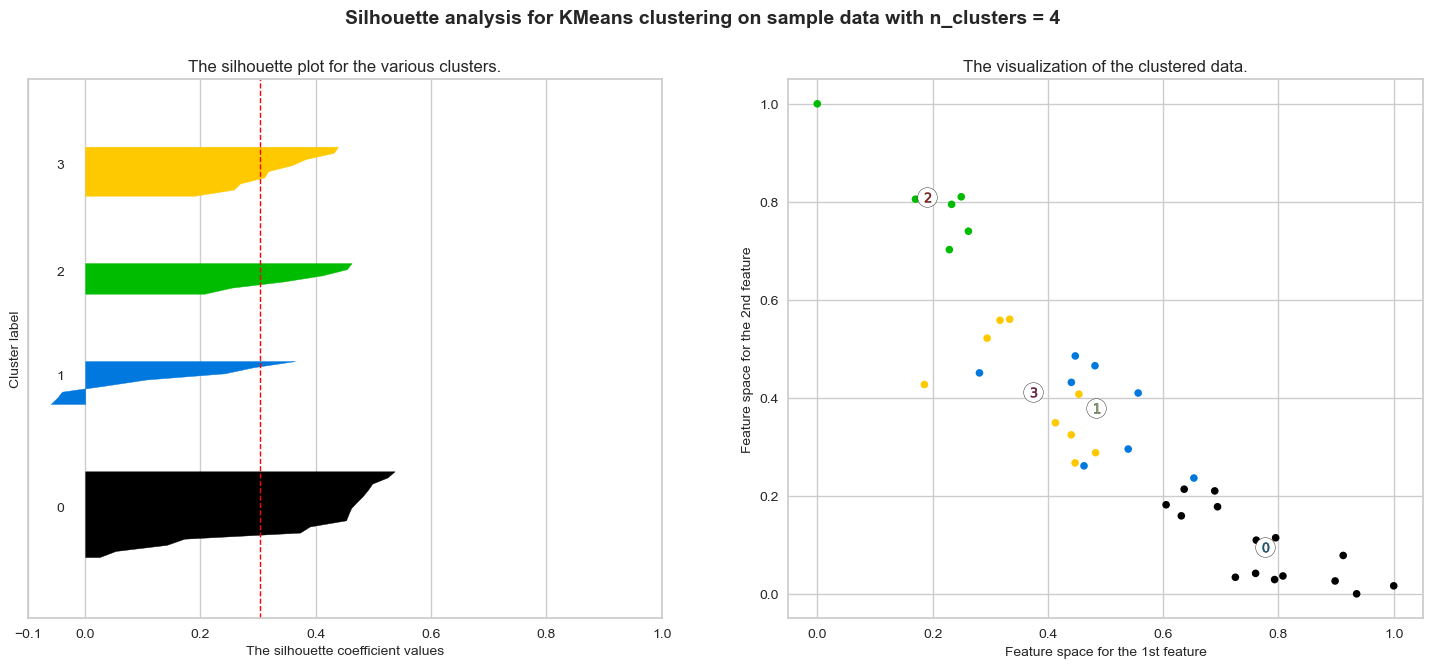

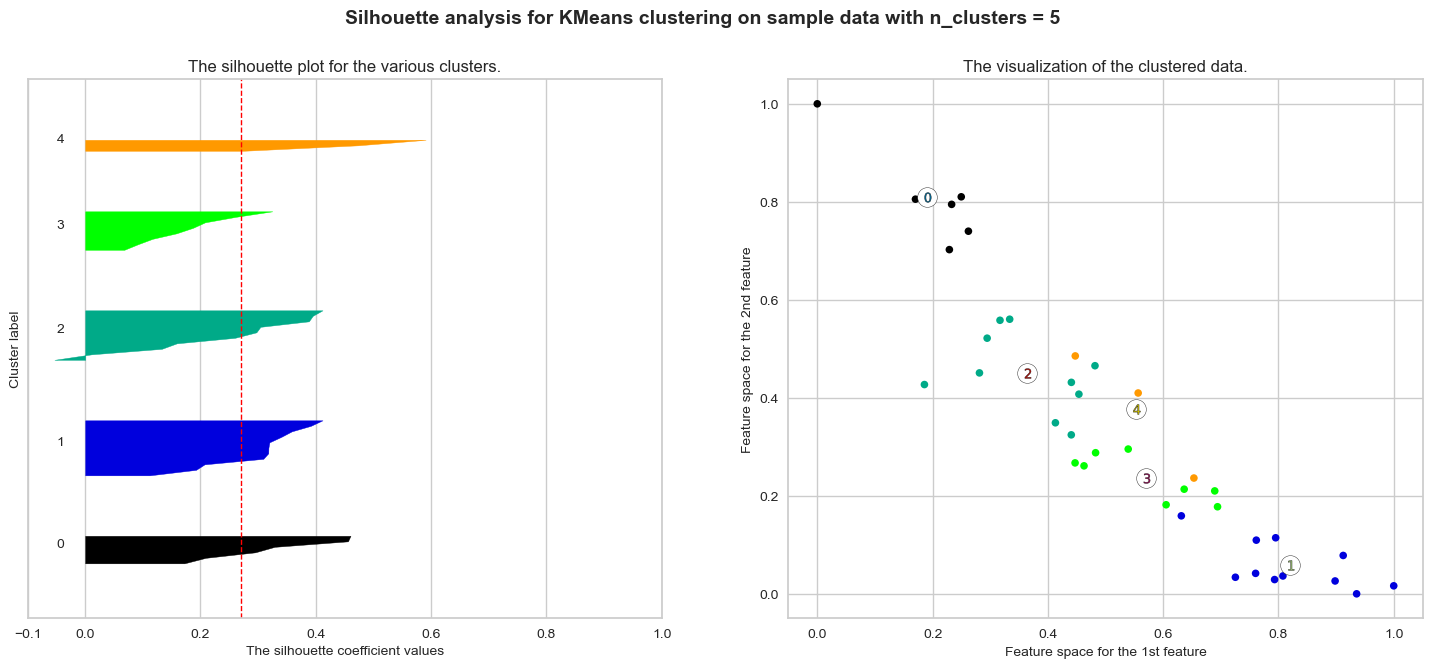

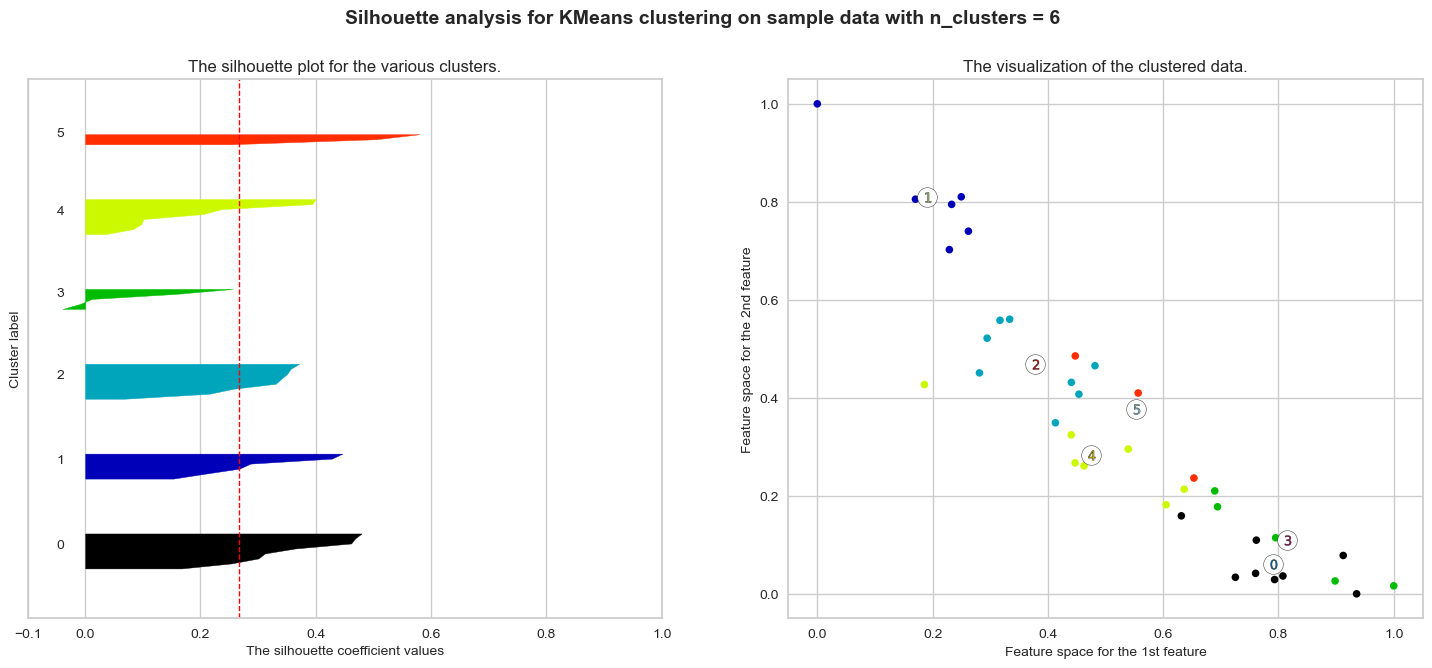

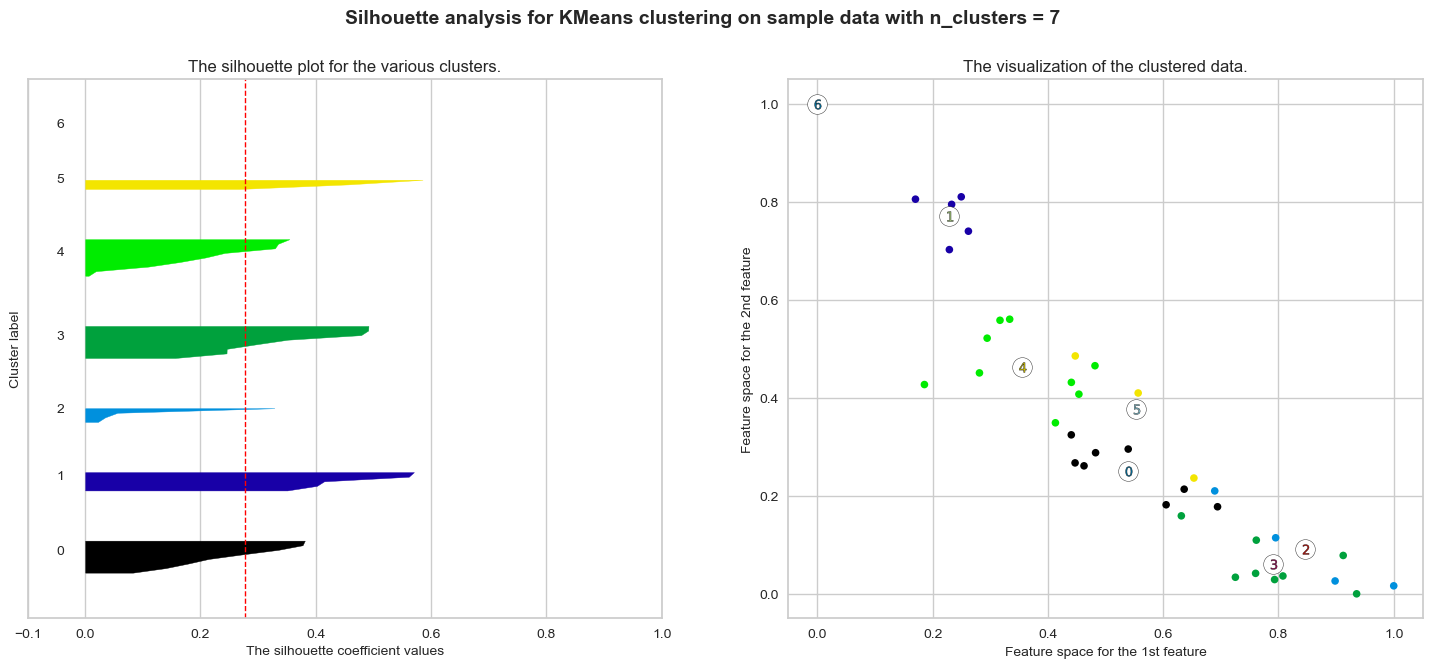

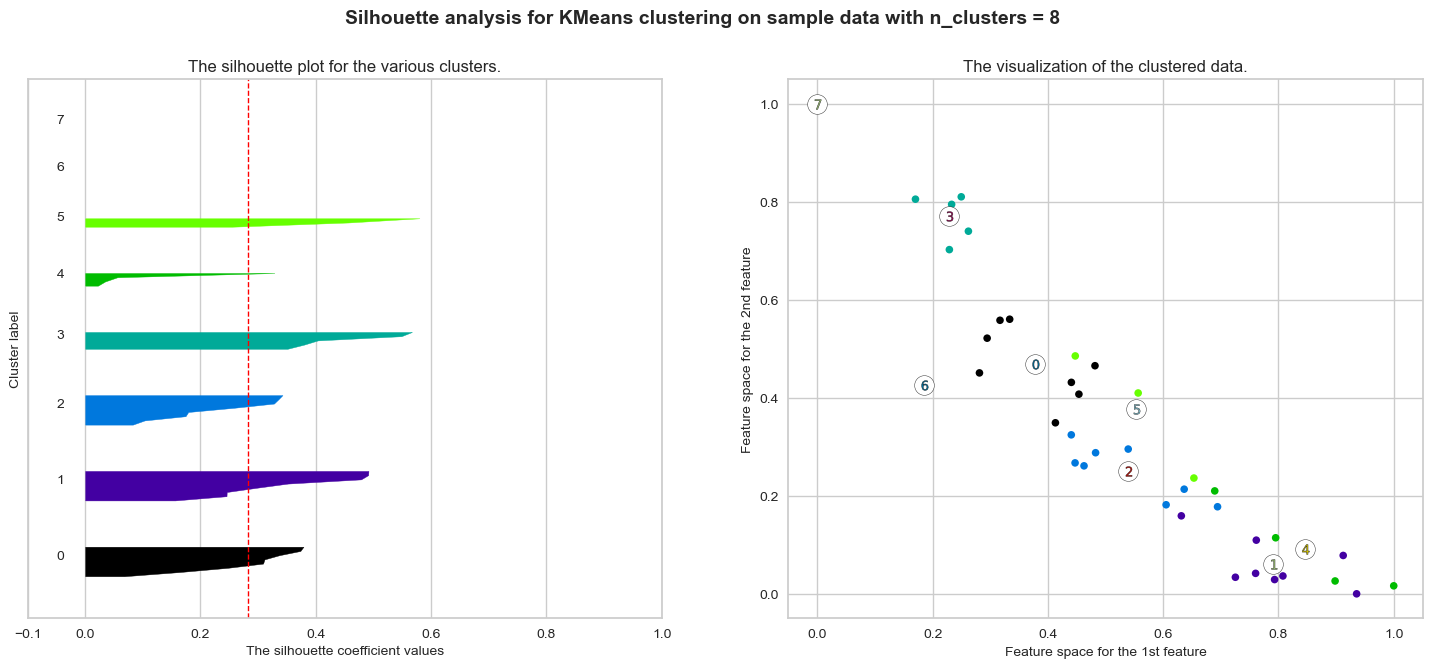

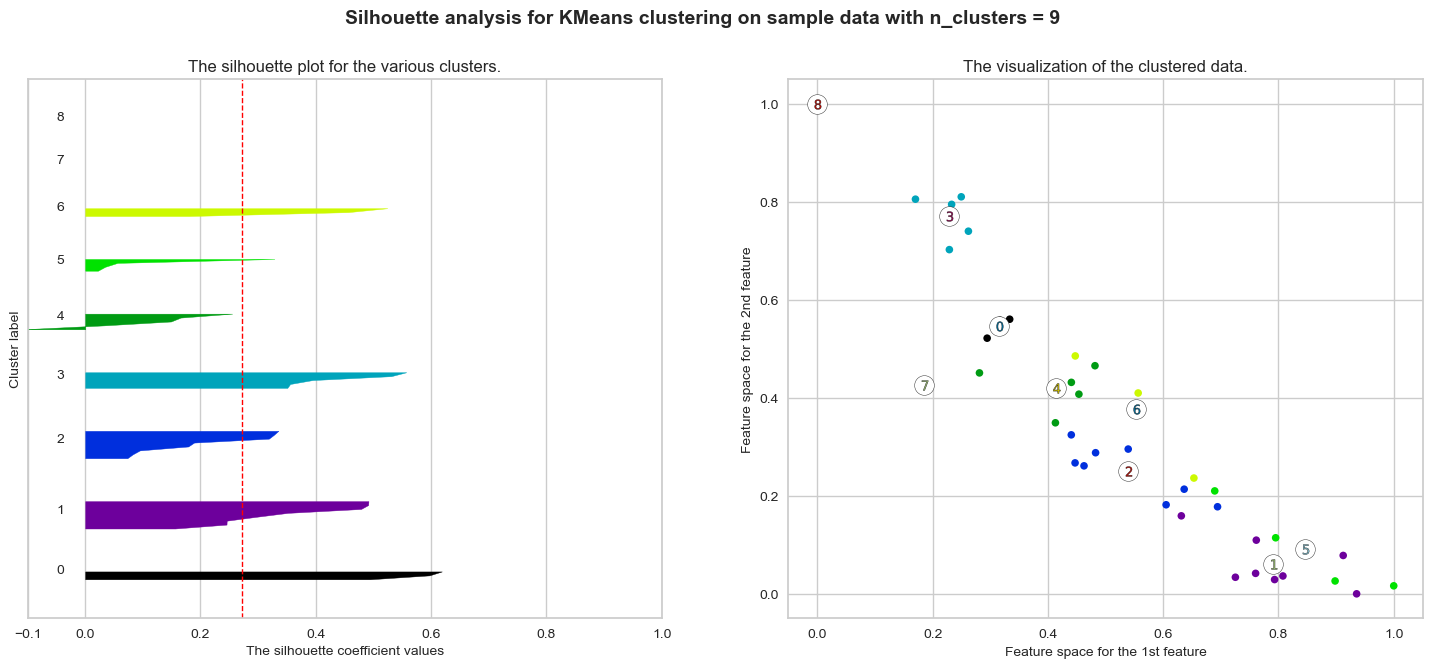

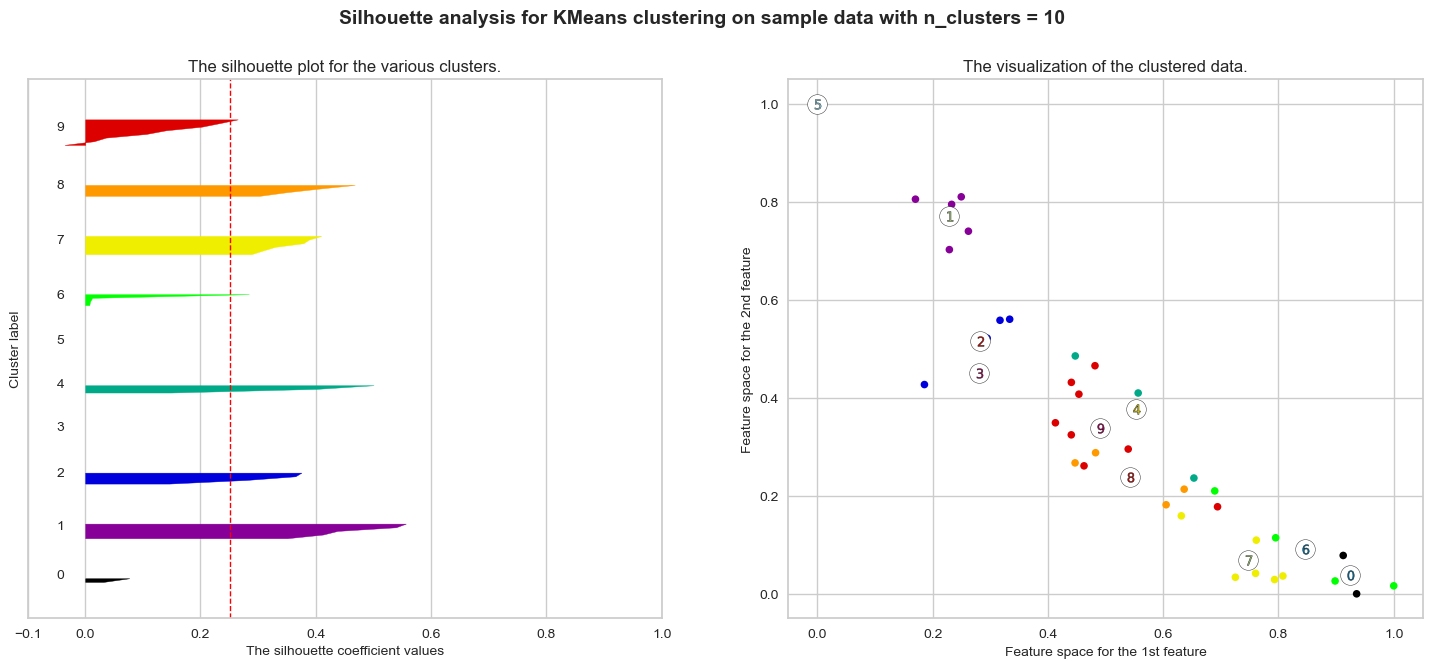

In [17]:
# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.


range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

silhu = []
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, 
                    max_iter=maxiter, 
                    init="k-means++", ### Com k-means++ o método só acha 7 rochas, ja com random ele acha 8.
                    tol=toler, 
                    n_init=ninit,
                    algorithm="elkan",
                    random_state = 0)
    cluster_labels = clusterer.fit_predict(X)
    y_kmeans = clusterer.fit(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )
    
    silhu.append(silhouette_avg)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=1.,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=120, lw=0, alpha=1., c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )
    
    
plt.show()

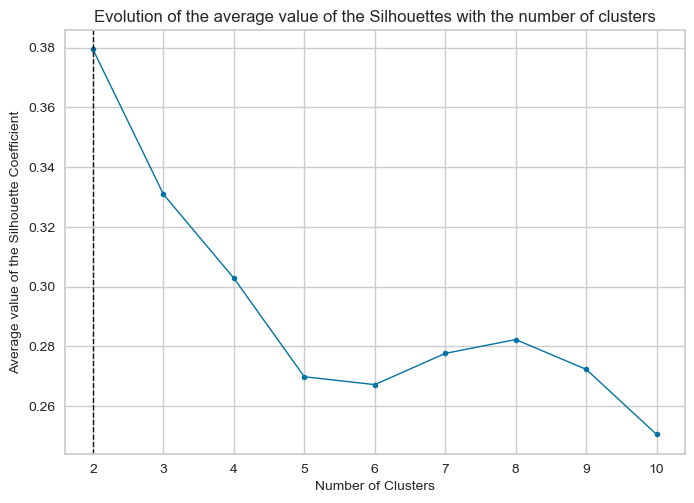

In [18]:
plt.plot(range_n_clusters, silhu, 'o-')
plt.axvline(argmax(silhu)+2, color = 'k', linestyle ='--')
#plt.plot(argmax(silhu)+2, max(silhu), 'ok', label = 'Highest average value of "Coef. Silhouette')

plt.title('Evolution of the average value of the Silhouettes with the number of clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Average value of the Silhouette Coefficient')

#plt.legend()
plt.grid(True)
plt.show()

#### Elbow:

In [19]:
visualizer = KElbowVisualizer(clusterer, k=(2,11), timings=False)

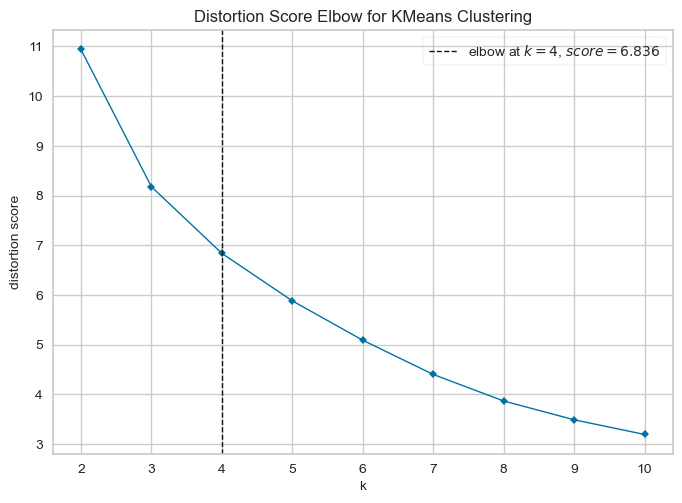

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [20]:
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

##### The two methods present different amounts of clusters for this data set.

##### The machine learning methods below were applied to these different numbers of clusters 

## The methodology that will be applied is:

1°) application of K-means (implemented by me with the Kmeans.py file) in order to separate the data into groups. With this, each sample will have a label (0, 1, 2, ...).

2°) application of Self-Organizing Maps (implemented by me with the Self_Organizing_Maps.py file) in order to obtain a data classification. Using the relationship between the labels obtained by K-Means with the percentages of the dataframe, it is possible to obtain the behavior pattern of the data in the training phase of the Nueral Network. Thus, the network can be used to classify a different Geochemical sample in a nearby region.

The method is applied to two different configurations of groups: 2 clusters obtained by the silhouette coefficient method and 4 clusters obtained by the Elbow method.

#### Below is a brief explanation of how SOM works:

## Self-Organizing Maps

The Self Organizing Maps developed by KOHONEN (1982) is a neural network, which mimics the functioning of the Cerebral Cortex, and characterized by being a single layer network. The figure below shows the topography of the Nueral Network, where we have the input samples, the Neural Network (Cortex) and the weights connecting each sample to each of the Nuronium Network.

<img src="./figures/latent_space.png"></img>

Self Organization Maps (SOM) algorithm training is typically divided into two stages: competitive and cooperative. The figure below shows the dynamics between the SOM network and the samples (purple cloud).

Competition: in this stage, the winning neuron with the best correspondence in relation to the input data is selected, figure (a).

Cooperation: here, the weights of the winner are adapted, as well as those of the immediate neighboring neurons of the network, figure (b).

After several iterations, the Neurons have new weights and the neural network manages to represent the samples, (figure c).


<img src="./figures/algorithm.png"></img>

                   (a)                             (b)                              (c)


## Algoritmo

The SOM algorithm can be described in the following steps:

1. Initialize the neurons ($\mathbf{w}$) in the parameter space

2. Select a random sample of data ($\mathbf{x}$): $\mathbf{x}_n$

3. Find the most similar neuron to this sample (best-matching unit, BMU)

    $$BMU = \underset{j}{\arg \min} \left \| \mathbf{x}_n - \mathbf{w}_j \right \|$$

4. Adjust excited neurons:

    $$\Delta \mathbf{w}^{n} = \alpha(n) \cdot h(D(\mathbf{w}_{BMU},\mathbf{w}), n) \otimes (\mathbf{ x}_n - \mathbf{w}^{n})$$
    $$\mathbf{w}^{n+1} = \mathbf{w}^{n} + \Delta \mathbf{w}^{n}$$

5. Repeat from step 2 until reaching the stopping criterion

Where $n$ is the algorithm step, $\alpha$ is the learning rate and $h$ is the neighborhood function.

### 1st: for 4 clusters:

In [21]:
from machine_learning import Kmeans

In [22]:
tol = 0.3
it = 50
k = 4

In [23]:
centroids_coord, ite, index, inercia = Kmeans.K_means(np.array(df_new), 
                                                      k, 
                                                      it, 
                                                      tol, 
                                                      random='input_data')

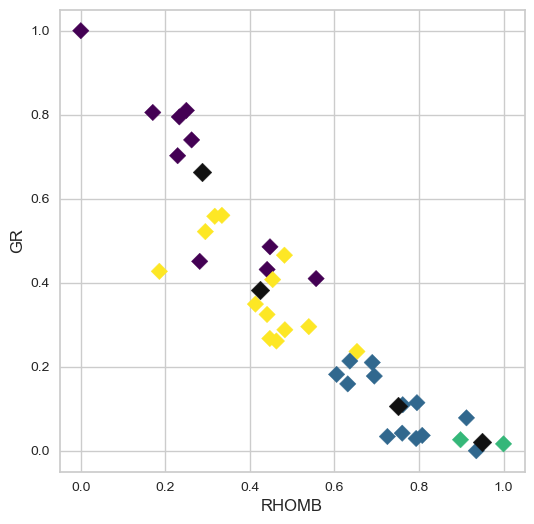

In [24]:
plt.close('all')
plt.figure(figsize=(6,6))

plt.scatter(df_new['SiO2'], df_new['TiO2'], c = index, cmap='viridis'
            , s=70, alpha=1.0) 
plt.scatter(centroids_coord[:,0], centroids_coord[:,1], c='k'
            , s=90, alpha=1.0) 
plt.xlabel('RHOMB', fontsize = 12)
plt.ylabel('GR', fontsize = 12)
plt.grid(True)
plt.show()

#### Self-Organizing Maps:

##### Split data:

In [25]:
data_x = np.array(df_new)

In [26]:
data_y = np.array(index)
data_y

array([1, 0, 0, 3, 1, 1, 1, 1, 1, 3, 0, 3, 0, 3, 1, 2, 1, 1, 1, 2, 3, 1,
       3, 3, 3, 1, 3, 3, 0, 1, 0, 3, 3, 0, 0, 0, 3, 0])

#### Plotar labels no dataframe!

In [27]:
# train and test split
train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size=0.2, random_state=42)
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape) # check the shapes

(30, 10) (30,) (8, 10) (8,)


In [28]:
from machine_learning import Self_Organizing_Maps

In [29]:
# n_rows x n_cols justification:

#### Using the TIAN equation, Jing et. al. (2014)* below to obtain an ideal number of neurons for the network:

$ M ≈ 5 \sqrt N $

#### Where: N = number of samples

#### The amount of Neurons for the SOM neural network was chosen. for 30 training samples -> $ M ≈ 5 \sqrt 30 ≈ 27 $, that is, a network of approximately 5 x 5 neurons.

##### * TIAN, Jing; AZARIAN, Michael H.; PECHT, Michael. Anomaly detection using self-organizing maps-based k-nearest neighbor algorithm. In: PHM society European conference. 2014.

In [30]:
# hyperparameters
n_rows = 5
n_cols = 5
max_distance = 3.
max_learning_rate = 1 #0.5
max_epochs = int(1000)
t = np.random.randint(0,high=train_x.shape[0]) # random index of traing data

In [31]:
# "SOM_train" performs the competition, cooperation and updating
# of the neurons using the training data.
# It returns the weight of neurons updated after iterations, 
# stored in the variable "updated_som1".

updated_som1 = Self_Organizing_Maps.SOM_train(n_rows, 
                                              n_cols, 
                                              max_epochs, 
                                              max_learning_rate, 
                                              max_distance, 
                                              train_x, 
                                              train_y, 
                                              learn='linear', 
                                              neigh='gaussian', 
                                              metric='euclidian')

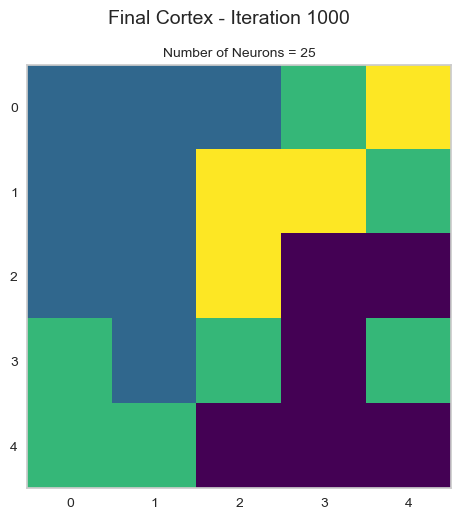

In [32]:
# "Cortex_map" shows the final Cortex showing the formed neighborhoods (same colors),
# using the adjusted weights "updated_som1"

label_map1 = Self_Organizing_Maps.Cortex_map(train_y, 
                                             train_x, 
                                             updated_som1,
                                             max_epochs, 
                                             metric='euclidian')

In [33]:
# "SOM_class" classifies test data from step learning with "SOM_train". 
# Using association between neuron weight labels (updated_som1 + label_map1) and 
# test data property values (test_x).

index1 = Self_Organizing_Maps.SOM_class(test_x, 
                                        updated_som1, 
                                        label_map1, 
                                        metric='euclidian')

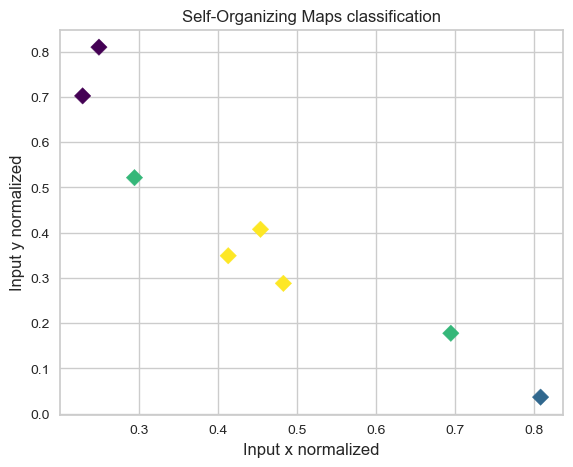

In [34]:
# "Crossplot" classification of data using two properties

Self_Organizing_Maps.Crossplot(index1, test_x, 0, 1)

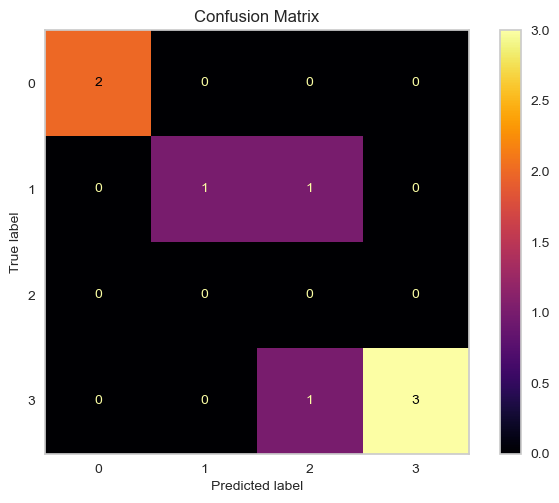

In [35]:
# "Confusion matrix" shows how well the test data was classified. 
# The more diagonal, means the better the classification 
# (comparison between actual and predicted labels)

conf_matrix = confusion_matrix(test_y, index1)
vis = ConfusionMatrixDisplay(confusion_matrix=conf_matrix) #, display_labels=ind)
vis.plot(cmap='inferno')
plt.title('Confusion Matrix')
plt.grid(False)
plt.show()

### 2nd: for 2 clusters:

In [36]:
tol = 0.3
it = 50
k = 2

In [37]:
centroids_coord, ite, index, inercia = Kmeans.K_means(np.array(df_new), 
                                                      k, 
                                                      it, 
                                                      tol, 
                                                      random='input_data')

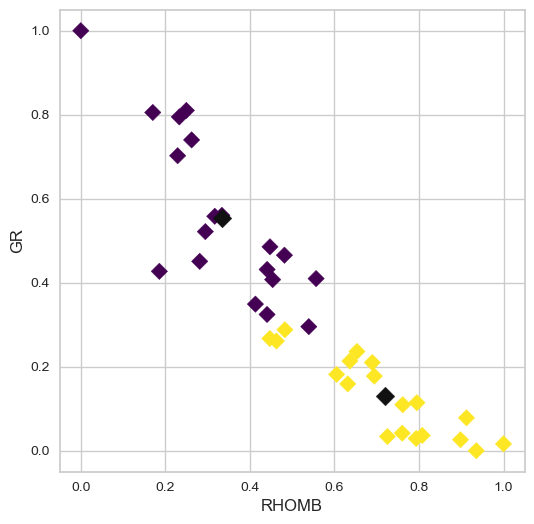

In [38]:
plt.close('all')
plt.figure(figsize=(6,6))

plt.scatter(df_new['SiO2'], df_new['TiO2'], c = index, cmap='viridis'
            , s=70, alpha=1.0) 
plt.scatter(centroids_coord[:,0], centroids_coord[:,1], c='k'
            , s=90, alpha=1.0) 
plt.xlabel('RHOMB', fontsize = 12)
plt.ylabel('GR', fontsize = 12)
plt.grid(True)
plt.show()

#### Split data:

In [39]:
data_x = np.array(df_new)

In [40]:
data_y = np.array(index)
data_y

array([1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0])

#### Plotar labels no dataframe!

In [41]:
# train and test split
train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size=0.2, random_state=42)
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape) # check the shapes

(30, 10) (30,) (8, 10) (8,)


#### Below, I used a 3x3 grid, as the results with a 5x5 grid were not satisfactory. Perhaps, the 5x5 network may have presented a very high complexity, in addition to the proposed problem, which may have caused Overffiting.

In [42]:
# hyperparameters
n_rows = 3
n_cols = 3
max_distance = 3.
max_learning_rate = 1 #0.5
max_epochs = int(1000)
t = np.random.randint(0,high=train_x.shape[0]) # random index of traing data

In [43]:
# "SOM_train" performs the competition, cooperation and updating
# of the neurons using the training data.
# It returns the weight of neurons updated after iterations, 
# stored in the variable "updated_som2".

updated_som2 = Self_Organizing_Maps.SOM_train(n_rows, 
                                              n_cols, 
                                              max_epochs, 
                                              max_learning_rate, 
                                              max_distance, 
                                              train_x, 
                                              train_y, 
                                              learn='linear', 
                                              neigh='gaussian', 
                                              metric='euclidian')

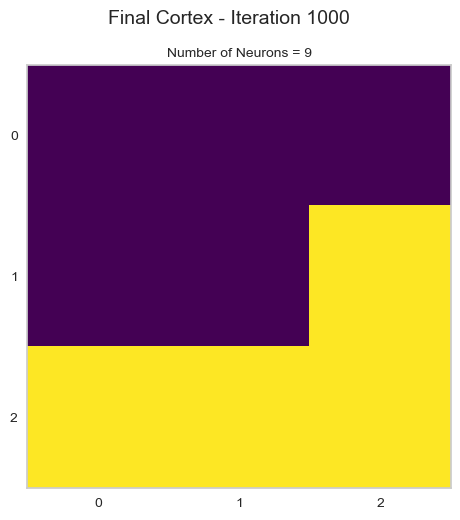

In [44]:
# "Cortex_map" shows the final Cortex showing the formed neighborhoods (same colors),
# using the adjusted weights "updated_som2"

label_map2 = Self_Organizing_Maps.Cortex_map(train_y, 
                                             train_x, 
                                             updated_som2,
                                             max_epochs, 
                                             metric='euclidian')


In [45]:
# "SOM_class" classifies test data from step learning with "SOM_train". 
# Using association between neuron weight labels (updated_som2 + label_map2) and 
# test data property values (test_x).

index2 = Self_Organizing_Maps.SOM_class(test_x, 
                                        updated_som2, 
                                        label_map2, 
                                        metric='euclidian')

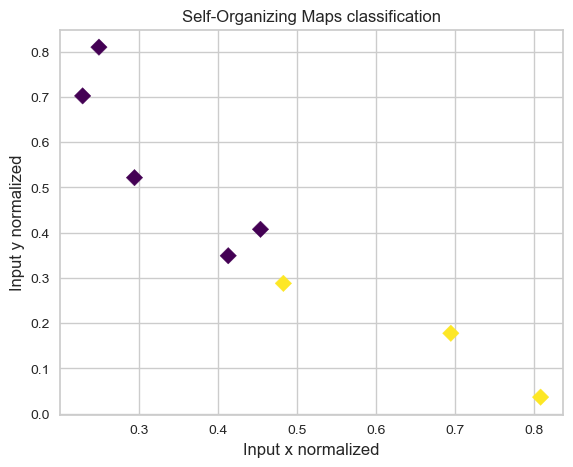

In [46]:
# "Crossplot" classification of data using two properties

Self_Organizing_Maps.Crossplot(index2, test_x, 0, 1)

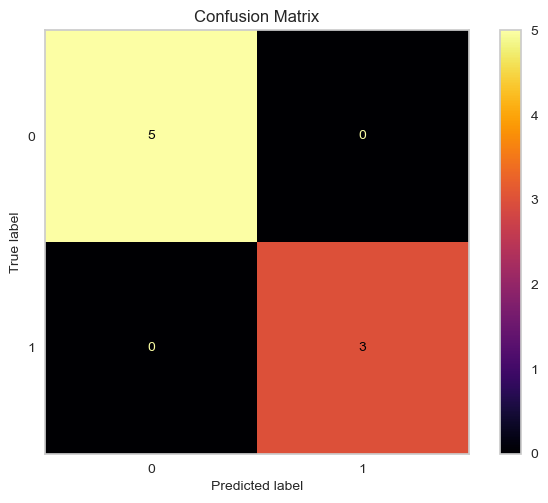

In [47]:
# "Confusion matrix" shows how well the test data was classified. 
# The more diagonal, means the better the classification 
# (comparison between actual and predicted labels)

conf_matrix = confusion_matrix(test_y, index2)
vis = ConfusionMatrixDisplay(confusion_matrix=conf_matrix) #, display_labels=ind)
vis.plot(cmap='inferno')
plt.title('Confusion Matrix')
plt.grid(False)
plt.show()

### END